In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import tree
from sklearn.tree import export_graphviz
import altair as alt
from dtreeviz.trees import dtreeviz # will be used for tree visualization
from matplotlib import pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import GradientBoostingRegressor
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

## File Import

In [2]:
df = pd.read_csv("../data_input/feed_v1.csv", index_col = None)
df = df.drop(columns = 'Unnamed: 0')
df

,Ts,t,HF,Weight,Tr,sheet_name,compound,exp_no
0,40.1741,0,0.483698,100.0000,25.0000,I1-30-1,05-85,3
1,40.1511,1,0.447084,99.9913,25.1667,I1-30-1,05-85,3
2,40.1566,2,0.428202,99.9864,25.3333,I1-30-1,05-85,3
3,40.1877,3,0.414622,99.9841,25.5000,I1-30-1,05-85,3
4,40.2206,4,0.383961,99.9881,25.6667,I1-30-1,05-85,3
...,...,...,...,...,...,...,...,...
41854,506.0690,4646,249.412000,35.8362,500.0000,DAO (1),DAO,1
41855,506.0730,4647,249.411000,35.8377,500.0000,DAO (1),DAO,1
41856,506.0740,4648,249.409000,35.8393,500.0000,DAO (1),DAO,1
41857,506.0710,4649,249.408000,35.8409,500.0000,DAO (1),DAO,1


In [3]:
df.groupby(['compound', 'exp_no']).agg('count').reset_index()

,compound,exp_no,Ts,t,HF,Weight,Tr,sheet_name
0,05-85,1,4651,4651,4651,4651,4651,4651
1,05-85,2,4651,4651,4651,4651,4651,4651
2,05-85,3,4651,4651,4651,4651,4651,4651
3,1-8,1,4651,4651,4651,4651,4651,4651
4,1-8,2,4651,4651,4651,4651,4651,4651
5,1-8,3,4651,4651,4651,4651,4651,4651
6,DAO,1,4651,4651,4651,4651,4651,4651
7,DAO,2,4651,4651,4651,4651,4651,4651
8,DAO,3,4651,4651,4651,4651,4651,4651


In [4]:
df.compound.value_counts()

DAO      13953
1-8      13953
05-85    13953
Name: compound, dtype: int64

In [5]:
def test_train_compound(df, product):
    """
    Function to split test/train data for each compound
    
    Argument:
        df      : pandas dataframe
        product : tbbpa, caoh2, both
        
    Output:
        X_train, X_test, y_train, y_test : 4 pandas dataframe which have the split data 
    """
    df = df.query('compound == @product')
    
    X_train = df.query('exp_no != 3')[["Ts", 't', 'HF', 'Tr']]
    y_train = df.query('exp_no != 3')["Weight"]
    
    X_test = df.query('exp_no == 3')[["Ts", 't', 'HF', 'Tr']]
    y_test = df.query('exp_no == 3')["Weight"]
    
    return X_train, X_test, y_train, y_test

In [6]:
df_results = pd.DataFrame({'Model': [],
                           'Compound' : [],
                           'Train Accuracy': [],
                           'Test Accuracy' : []
                           })
df_results

,Model,Compound,Train Accuracy,Test Accuracy


## Summary

In [20]:
df_results

,Model,Compound,Train Accuracy,Test Accuracy
NaN,Linear Regression,DAO,0.946946,0.931452
NaN,Linear Regression,05-85,0.956423,0.927052
NaN,Linear Regression,1-8,0.944706,0.937710
NaN,Partial Least Squares (n=2),DAO,0.897425,0.890823
NaN,Partial Least Squares (n=2),05-85,0.898550,0.893091
NaN,Partial Least Squares (n=2),1-8,0.892370,0.896028
NaN,Partial Least Squares (n=3),DAO,0.943296,0.929892
NaN,Partial Least Squares (n=3),05-85,0.950040,0.925675
NaN,Partial Least Squares (n=3),1-8,0.940133,0.934927
NaN,Random Forest Regression (max_depth = 2),DAO,0.993881,0.991804


## Linear Modelling

In [8]:
def linear_model(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    lr = LinearRegression().fit(X_train, y_train.ravel())
    
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = lr.predict(X_test)
    df_pred.to_csv(r'../output/scenario6/prediction_lr_{}.csv'.format(product))
    
    
    print("The training accuracy for the model is ", lr.score(X_train, y_train))
    print("The testing accuracy for the model is ", lr.score(X_test, y_test))
    return pd.DataFrame({'Model': 'Linear Regression',
                           'Train Accuracy': lr.score(X_train, y_train),
                           'Test Accuracy' : lr.score(X_test, y_test),
                           'Compound' : product}, index = [None])
    
for i in df.compound.value_counts().index:
    df_results = df_results.append(linear_model(df, i))
    

The 4 matrices for -- DAO -- are of sizes:  (9302, 4) (4651, 4) (9302,) (4651,)
The training accuracy for the model is  0.9469457143773354
The testing accuracy for the model is  0.9314519692210672
The 4 matrices for -- 05-85 -- are of sizes:  (9302, 4) (4651, 4) (9302,) (4651,)
The training accuracy for the model is  0.9564234117109199
The testing accuracy for the model is  0.9270523831612412
The 4 matrices for -- 1-8 -- are of sizes:  (9302, 4) (4651, 4) (9302,) (4651,)
The training accuracy for the model is  0.9447059372947056
The testing accuracy for the model is  0.9377098209606001


## PLSR

In [9]:
def pls2(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    pls2 = PLSRegression(n_components=2).fit(X_train, y_train)
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = pls2.predict(X_test)
    df_pred.to_csv(r'../output/scenario6/prediction_plsr2_{}.csv'.format(product))
    
    print("The training accuracy for the model is ", pls2.score(X_train, y_train))
    print("The testing accuracy for the model is ", pls2.score(X_test, y_test))
    return pd.DataFrame({'Model': 'Partial Least Squares (n=2)',
                           'Train Accuracy': pls2.score(X_train, y_train),
                           'Test Accuracy' : pls2.score(X_test, y_test),
                           'Compound' : i}, index = [None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(pls2(df, i))

The 4 matrices for -- DAO -- are of sizes:  (9302, 4) (4651, 4) (9302,) (4651,)
The training accuracy for the model is  0.8974250955597778
The testing accuracy for the model is  0.8908228373229896
The 4 matrices for -- 05-85 -- are of sizes:  (9302, 4) (4651, 4) (9302,) (4651,)
The training accuracy for the model is  0.8985502404127113
The testing accuracy for the model is  0.8930909447520233
The 4 matrices for -- 1-8 -- are of sizes:  (9302, 4) (4651, 4) (9302,) (4651,)
The training accuracy for the model is  0.892369529018288
The testing accuracy for the model is  0.896028340165867


In [10]:
df_results

,Model,Compound,Train Accuracy,Test Accuracy
NaN,Linear Regression,DAO,0.946946,0.931452
NaN,Linear Regression,05-85,0.956423,0.927052
NaN,Linear Regression,1-8,0.944706,0.937710
NaN,Partial Least Squares (n=2),DAO,0.897425,0.890823
NaN,Partial Least Squares (n=2),05-85,0.898550,0.893091
NaN,Partial Least Squares (n=2),1-8,0.892370,0.896028


In [11]:
def pls3(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    pls3 = PLSRegression(n_components=3).fit(X_train, y_train)
    print("The training accuracy for the model is ", pls3.score(X_train, y_train))
    print("The testing accuracy for the model is ", pls3.score(X_test, y_test))
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = pls3.predict(X_test)
    df_pred.to_csv(r'../output/scenario6/prediction_plsr3_{}.csv'.format(product))
    
    return pd.DataFrame({'Model': 'Partial Least Squares (n=3)',
                           'Train Accuracy': pls3.score(X_train, y_train),
                           'Test Accuracy' : pls3.score(X_test, y_test),
                           'Compound' : i}, index = [None])
for i in df.compound.value_counts().index:
    df_results = df_results.append(pls3(df, i))

The 4 matrices for -- DAO -- are of sizes:  (9302, 4) (4651, 4) (9302,) (4651,)
The training accuracy for the model is  0.9432962034824478
The testing accuracy for the model is  0.9298915106142717
The 4 matrices for -- 05-85 -- are of sizes:  (9302, 4) (4651, 4) (9302,) (4651,)
The training accuracy for the model is  0.9500401306093812
The testing accuracy for the model is  0.9256746065166611
The 4 matrices for -- 1-8 -- are of sizes:  (9302, 4) (4651, 4) (9302,) (4651,)
The training accuracy for the model is  0.9401330572842138
The testing accuracy for the model is  0.9349268847957132


## Random forest

In [12]:
def random_forest(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rf2 = RandomForestRegressor(random_state=0, max_depth = 2).fit(X_train, y_train)
    
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = rf2.predict(X_test)
    df_pred.to_csv(r'../output/scenario6/prediction_rf2_{}.csv'.format(product))
    
    
    print("The training accuracy for the model is ", rf2.score(X_train, y_train))
    print("The testing accuracy for the model is ", rf2.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Random Forest Regression (max_depth = 2)',
                           'Train Accuracy': rf2.score(X_train, y_train),
                           'Test Accuracy' : rf2.score(X_test, y_test),
                           'Compound' : i}, index=[None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(random_forest(df, i))

The 4 matrices for -- DAO -- are of sizes:  (9302, 4) (4651, 4) (9302,) (4651,)
The training accuracy for the model is  0.9938813585591082
The testing accuracy for the model is  0.9918043491206467
The 4 matrices for -- 05-85 -- are of sizes:  (9302, 4) (4651, 4) (9302,) (4651,)
The training accuracy for the model is  0.9939484321654074
The testing accuracy for the model is  0.9920420673060635
The 4 matrices for -- 1-8 -- are of sizes:  (9302, 4) (4651, 4) (9302,) (4651,)
The training accuracy for the model is  0.9933890796287037
The testing accuracy for the model is  0.993732147629232


In [13]:
def random_forest(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rf5 = RandomForestRegressor(random_state=0, max_depth = 5).fit(X_train, y_train)
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = rf5.predict(X_test)
    df_pred.to_csv(r'../output/scenario6/prediction_rf5_{}.csv'.format(product))
    
    print("The training accuracy for the model is ", rf5.score(X_train, y_train))
    print("The testing accuracy for the model is ", rf5.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Random Forest Regression (max_depth = 5)',
                           'Train Accuracy': rf5.score(X_train, y_train),
                           'Test Accuracy' : rf5.score(X_test, y_test),
                           'Compound' : i}, index=[None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(random_forest(df, i))

The 4 matrices for -- DAO -- are of sizes:  (9302, 4) (4651, 4) (9302,) (4651,)
The training accuracy for the model is  0.9997887061023748
The testing accuracy for the model is  0.9970985142338813
The 4 matrices for -- 05-85 -- are of sizes:  (9302, 4) (4651, 4) (9302,) (4651,)
The training accuracy for the model is  0.9999527752567239
The testing accuracy for the model is  0.9976715505425876
The 4 matrices for -- 1-8 -- are of sizes:  (9302, 4) (4651, 4) (9302,) (4651,)
The training accuracy for the model is  0.9999253904067469
The testing accuracy for the model is  0.9996770607131371


In [14]:
def random_forest(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rf7 = RandomForestRegressor(random_state=0, max_depth = 7).fit(X_train, y_train)
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = rf7.predict(X_test)
    df_pred.to_csv(r'../output/scenario6/prediction_rf7_{}.csv'.format(product))
    
    print("The training accuracy for the model is ", rf7.score(X_train, y_train))
    print("The testing accuracy for the model is ", rf7.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Random Forest Regression (max_depth = 7)',
                           'Train Accuracy': rf7.score(X_train, y_train),
                           'Test Accuracy' : rf7.score(X_test, y_test),
                           'Compound' : i}, index=[None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(random_forest(df, i))

The 4 matrices for -- DAO -- are of sizes:  (9302, 4) (4651, 4) (9302,) (4651,)
The training accuracy for the model is  0.9999088930596031
The testing accuracy for the model is  0.9968985592212491
The 4 matrices for -- 05-85 -- are of sizes:  (9302, 4) (4651, 4) (9302,) (4651,)
The training accuracy for the model is  0.9999926276620438
The testing accuracy for the model is  0.9977020276859782
The 4 matrices for -- 1-8 -- are of sizes:  (9302, 4) (4651, 4) (9302,) (4651,)
The training accuracy for the model is  0.9999853288264007
The testing accuracy for the model is  0.9997174498390449


In [15]:
def random_forest(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rf10 = RandomForestRegressor(random_state=0, max_depth = 10).fit(X_train, y_train)
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = rf10.predict(X_test)
    df_pred.to_csv(r'../output/scenario6/prediction_rf10_{}.csv'.format(product))
    
    print("The training accuracy for the model is ", rf10.score(X_train, y_train))
    print("The testing accuracy for the model is ", rf10.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Random Forest Regression (max_depth = 10)',
                           'Train Accuracy': rf10.score(X_train, y_train),
                           'Test Accuracy' : rf10.score(X_test, y_test),
                           'Compound' : i}, index=[None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(random_forest(df, i))

The 4 matrices for -- DAO -- are of sizes:  (9302, 4) (4651, 4) (9302,) (4651,)
The training accuracy for the model is  0.9999561198930729
The testing accuracy for the model is  0.9970124144736316
The 4 matrices for -- 05-85 -- are of sizes:  (9302, 4) (4651, 4) (9302,) (4651,)
The training accuracy for the model is  0.9999989036890474
The testing accuracy for the model is  0.9977765710035583
The 4 matrices for -- 1-8 -- are of sizes:  (9302, 4) (4651, 4) (9302,) (4651,)
The training accuracy for the model is  0.9999982382251044
The testing accuracy for the model is  0.999698514000193


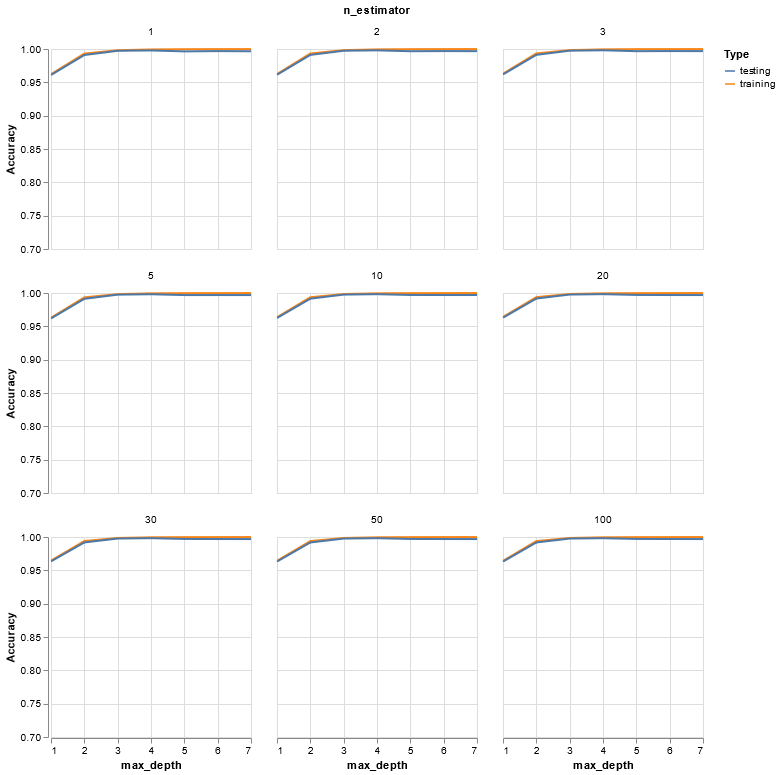

In [16]:
n_est = [1,2,3,5,10,20,30,50,100]
max_depth = range(1,8)
X_train, X_test, y_train, y_test = test_train_compound(df, "DAO")
trees = []
train_acc = []
test_acc = []
depth = []
for j in max_depth:
    for i in n_est:
        trees.append(i)
        depth.append(j)
        rf = RandomForestRegressor(n_estimators = i, max_depth = j, random_state=0).fit(X_train, y_train)
        train_acc.append(rf.score(X_train, y_train))
        test_acc.append(rf.score(X_test, y_test))
        #print(j,i)
df_rf = pd.DataFrame({'training' : train_acc,
                      'testing' : test_acc,
                      'n_estimator' : trees,
                      'max_depth' : depth})
df_rf = df_rf.melt(id_vars = ['n_estimator', 'max_depth'], var_name = 'Type', value_name = 'Accuracy')
df_rf
alt.Chart(df_rf).mark_line().encode(
    alt.X('max_depth'),
    alt.Y('Accuracy', scale=alt.Scale(domain=[0.7, 1])),
    alt.Color('Type'),
    alt.Facet('n_estimator')
    ).properties(width = 200, height = 200, columns = 3)

## SVR

In [17]:
def svr_rbf(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    svr_rbf = SVR(kernel="rbf").fit(X_train, y_train)
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = svr_rbf.predict(X_test)
    df_pred.to_csv(r'../output/scenario6/prediction_svr_rbf_{}.csv'.format(product))
    
    print("The training accuracy for the model is ", svr_rbf.score(X_train, y_train))
    print("The testing accuracy for the model is ", svr_rbf.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'SVR RBF Kernel',
                           'Train Accuracy': svr_rbf.score(X_train, y_train),
                           'Test Accuracy' : svr_rbf.score(X_test, y_test),
                           'Compound' : i}, index=[None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(svr_rbf(df, i))

The 4 matrices for -- DAO -- are of sizes:  (9302, 4) (4651, 4) (9302,) (4651,)
The training accuracy for the model is  0.9598879467781147
The testing accuracy for the model is  0.9596515955329349
The 4 matrices for -- 05-85 -- are of sizes:  (9302, 4) (4651, 4) (9302,) (4651,)
The training accuracy for the model is  0.9596918303523224
The testing accuracy for the model is  0.9603804708422765
The 4 matrices for -- 1-8 -- are of sizes:  (9302, 4) (4651, 4) (9302,) (4651,)
The training accuracy for the model is  0.9616479310459571
The testing accuracy for the model is  0.9603229061629446


## GBR

In [18]:
def gbr(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    gbr = GradientBoostingRegressor().fit(X_train,y_train)
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = gbr.predict(X_test)
    df_pred.to_csv(r'../output/scenario6/prediction_gbr_{}.csv'.format(product))
    
    print("The training accuracy for the model is ", gbr.score(X_train, y_train))
    print("The testing accuracy for the model is ", gbr.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Gradient Boost Regressor',
                           'Train Accuracy': gbr.score(X_train, y_train),
                           'Test Accuracy' : gbr.score(X_test, y_test),
                           'Compound' : i}, index=[None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(gbr(df, i))

The 4 matrices for -- DAO -- are of sizes:  (9302, 4) (4651, 4) (9302,) (4651,)
The training accuracy for the model is  0.9998354145642946
The testing accuracy for the model is  0.9977383325764363
The 4 matrices for -- 05-85 -- are of sizes:  (9302, 4) (4651, 4) (9302,) (4651,)
The training accuracy for the model is  0.9999903593105639
The testing accuracy for the model is  0.9978880383625613
The 4 matrices for -- 1-8 -- are of sizes:  (9302, 4) (4651, 4) (9302,) (4651,)
The training accuracy for the model is  0.9999823123748479
The testing accuracy for the model is  0.9991532071328885


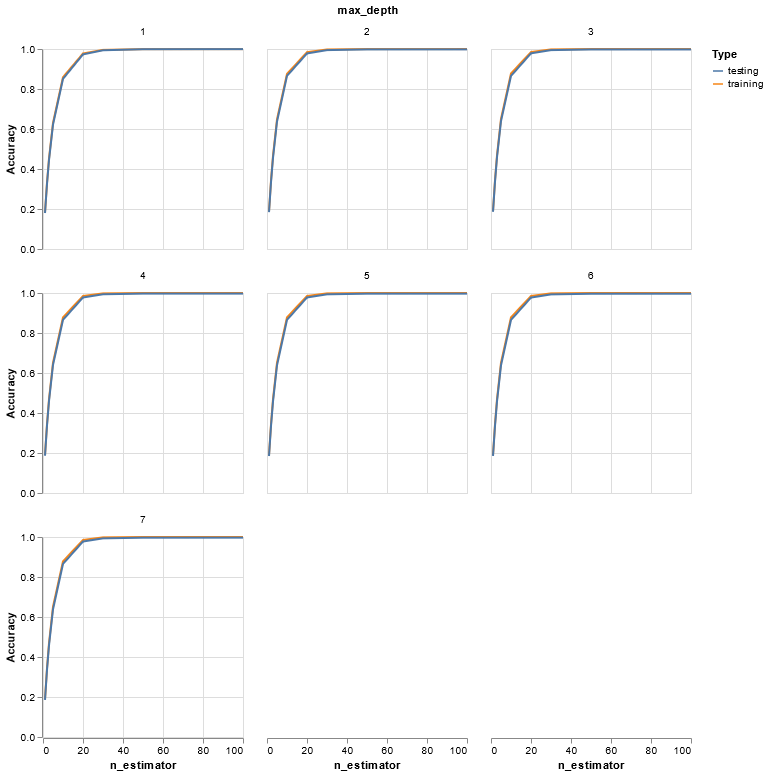

In [7]:
n_est = [1,2,3,5,10,20,30,50,100]
max_depth = range(1,8)
X_train, X_test, y_train, y_test = test_train_compound(df, "DAO")
trees = []
train_acc = []
test_acc = []
depth = []
for j in max_depth:
    for i in n_est:
        trees.append(i)
        depth.append(j)
        gbr = GradientBoostingRegressor(n_estimators = i, max_depth = j, random_state=0).fit(X_train, y_train)
        train_acc.append(gbr.score(X_train, y_train))
        test_acc.append(gbr.score(X_test, y_test))
        #print(j,i)
df_gbr = pd.DataFrame({'training' : train_acc,
                      'testing' : test_acc,
                      'n_estimator' : trees,
                      'max_depth' : depth})
df_gbr = df_gbr.melt(id_vars = ['n_estimator', 'max_depth'], var_name = 'Type', value_name = 'Accuracy')
df_gbr
alt.Chart(df_gbr).mark_line().encode(
    alt.X('n_estimator'),
    alt.Y('Accuracy', scale=alt.Scale(domain=[0, 1])),
    alt.Color('Type'),
    alt.Facet('max_depth')
    ).properties(width = 200, height = 200, columns = 3)

In [19]:
df_results.to_csv('../output/scenario6/results_table.csv')